ссылка на датасет: https://disk.yandex.com/d/xxOu37iPw59sPg

Было интересно попрактиковаться в pyspark, т.к. до этого я огрничивался лишь чтением теоритического материала и выпонением упражнений в обучающем тренажере. Затратил на выпонение 2 часа. Сложностей особых не было, но анализировать, визуализировать удобнее в пандасе. 

In [1]:
from pyspark.sql import SparkSession
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

### Изучение и предобработка данных

In [2]:
APP_NAME = "DataFrames"
#SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

df = spark.read.load('assignment_data.jsonl', 
                       format='json', header='true', inferSchema='true')


print(df.summary().show()) 

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/02 13:05:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
+-------+-------+-------+--------------------+--------------------+-------------------+
|summary|country|  event|           player_id|          session_id|                 ts|
+-------+-------+-------+--------------------+--------------------+-------------------+
|  count| 500584|1001169|             1001169|             1001169|            1001169|
|   mean|   null|   null|                null|                null|               null|
| stddev|   null|   null|                null|                null|               null|
|    min|  (.uk)|    end|0001c73df0b1453f8...|00000934-5c74-4c1...|2016-10-20T23:40:38|
|    25%|   null|   null|                null|                null|               null|
|    50%|   null|   null|                null|                null|               null|
|    75%|   null|   null|                null|                nul

In [3]:
df.show(10)

+-------+-----+--------------------+--------------------+-------------------+
|country|event|           player_id|          session_id|                 ts|
+-------+-----+--------------------+--------------------+-------------------+
|     PK|start|d6313e1fb7d247a6a...|674606b1-2270-428...|2016-11-22T20:40:50|
|   null|  end|20ac16ebb30a47708...|16ca9d01-d240-452...|2016-11-18T06:24:50|
|   null|  end|318e22b061b54042b...|5f933591-8cd5-414...|2016-11-16T18:01:37|
|   null|  end|29bb390d9b1b4b4b9...|ef939180-692a-484...|2016-11-13T10:38:09|
|     GH|start|a477ecabc3cc455cb...|4c55263e-66b2-481...|2016-11-29T19:31:43|
|     SK|start|1ec36a67785046b3b...|3346a60a-0989-404...|2016-11-16T05:36:16|
|     DE|start|9595af0063e94cb8a...|06830030-d091-428...|2016-11-07T01:18:09|
|   null|  end|8d0e3cd4a25d4a089...|a78a4889-4bcf-45a...|2016-11-24T02:12:33|
|   null|  end|e59f1fa31e144fd8b...|dd223ea6-0e6b-4dd...|2016-11-13T00:35:30|
|   null|  end|fd8a1e9fff25471da...|3015bf71-4b28-4c9...|2016-11

In [4]:
df.registerTempTable("df") 

/Users/welida/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [5]:
df[(df['event'] == 'start')].show()

+-------+-----+--------------------+--------------------+-------------------+
|country|event|           player_id|          session_id|                 ts|
+-------+-----+--------------------+--------------------+-------------------+
|     PK|start|d6313e1fb7d247a6a...|674606b1-2270-428...|2016-11-22T20:40:50|
|     GH|start|a477ecabc3cc455cb...|4c55263e-66b2-481...|2016-11-29T19:31:43|
|     SK|start|1ec36a67785046b3b...|3346a60a-0989-404...|2016-11-16T05:36:16|
|     DE|start|9595af0063e94cb8a...|06830030-d091-428...|2016-11-07T01:18:09|
|     FM|start|5fd71e49d9dc4053b...|1d9e6d4a-e1c0-402...|2016-11-08T23:39:07|
|     SC|start|4ac6fa82e7a84cad9...|b20c6b98-7f18-4ba...|2016-11-24T15:59:10|
|     KG|start|a34a6188d03746eb8...|c522efe9-847a-47b...|2016-11-13T12:46:31|
|     EE|start|85b7600411354ff3a...|58dd0153-026d-455...|2016-11-23T17:49:23|
|     GS|start|03c648a9437d401b8...|cd0f2f42-3ab2-450...|2016-11-29T22:01:36|
|     BN|start|d1aeb37eef7c40b49...|7d6e9f60-1baf-46e...|2016-11

In [6]:
spark.sql("SELECT * FROM df where event = 'start'").show()

+-------+-----+--------------------+--------------------+-------------------+
|country|event|           player_id|          session_id|                 ts|
+-------+-----+--------------------+--------------------+-------------------+
|     PK|start|d6313e1fb7d247a6a...|674606b1-2270-428...|2016-11-22T20:40:50|
|     GH|start|a477ecabc3cc455cb...|4c55263e-66b2-481...|2016-11-29T19:31:43|
|     SK|start|1ec36a67785046b3b...|3346a60a-0989-404...|2016-11-16T05:36:16|
|     DE|start|9595af0063e94cb8a...|06830030-d091-428...|2016-11-07T01:18:09|
|     FM|start|5fd71e49d9dc4053b...|1d9e6d4a-e1c0-402...|2016-11-08T23:39:07|
|     SC|start|4ac6fa82e7a84cad9...|b20c6b98-7f18-4ba...|2016-11-24T15:59:10|
|     KG|start|a34a6188d03746eb8...|c522efe9-847a-47b...|2016-11-13T12:46:31|
|     EE|start|85b7600411354ff3a...|58dd0153-026d-455...|2016-11-23T17:49:23|
|     GS|start|03c648a9437d401b8...|cd0f2f42-3ab2-450...|2016-11-29T22:01:36|
|     BN|start|d1aeb37eef7c40b49...|7d6e9f60-1baf-46e...|2016-11

## Ответы

### 1) Сколько сеансов в наборе данных?

Кол-во завершенных сессий (стартовавших и завершившихся в рамках наблюдений датасета):

In [7]:
%%time
print(df[(df['event'] == 'start')].join(df[(df['event'] == 'end')], how="inner", on="session_id").count())

500582
CPU times: user 3.21 ms, sys: 1.45 ms, total: 4.66 ms
Wall time: 2.54 s


In [8]:
%%time
print(spark.sql("""
                WITH 
                s AS (SELECT * FROM df WHERE event = 'start'),
                e AS(SELECT * FROM df WHERE event = 'end')
                SELECT * FROM 
                s INNER JOIN e ON s.session_id = e.session_id""").count())

500582
CPU times: user 2.04 ms, sys: 1.04 ms, total: 3.08 ms
Wall time: 1.53 s


### 2) Сколько сеансов завершается в каждой стране? Выведите 10 лучших результатов, отсортированных по количеству (DESC) и стране (ASC).

Учитывая, что значения country пропущены вовсех event==end, будем считать, что страна в которой сессия началась, там же заканчивается.
В другом файле, в котором я выполнял задания в пандасе, я запонял пропущенные значения. Здесь же сразу использовал event = 'start', т.к. на топ 10 это никак не влияет.

In [9]:
spark.sql("""SELECT country, count(session_id) 
                    FROM df WHERE event = 'start' 
                    GROUP BY country 
                    ORDER BY count(session_id) DESC, country ASC
                    LIMIT 10""") .show()

+-------+-----------------+
|country|count(session_id)|
+-------+-----------------+
|     IT|             2839|
|     SH|             2672|
|     AZ|             2670|
|     AT|             2655|
|     WF|             2616|
|     VA|             2602|
|     HU|             2584|
|     IL|             2563|
|     RO|             2550|
|     KR|             2535|
+-------+-----------------+



### 3) Сколько сессий завершает каждый игрок? Выведите 10 лучших результатов, отсортированных по count(DESC) и player_id(ASC).

In [10]:
spark.sql("""SELECT player_id, count(session_id) 
                    FROM df WHERE event = 'end' 
                    GROUP BY player_id 
                    ORDER BY count(session_id) DESC, player_id ASC
                    LIMIT 10""") .show()

+--------------------+-----------------+
|           player_id|count(session_id)|
+--------------------+-----------------+
|0052e4cfaf494af29...|               50|
|008c31d6d87d4a72a...|               50|
|019f6864a44e4cd1a...|               50|
|01d1f31c3c864538a...|               50|
|0259292bb77e4aaba...|               50|
|04318f09e6e7434bb...|               50|
|060243602575481db...|               50|
|067b20022f2040b0a...|               50|
|072d69b0074349689...|               50|
|08037331842341b2b...|               50|
+--------------------+-----------------+



### 4) В какой стране в 2016 году было начато наибольшее количество сеансов?

In [11]:
spark.sql("""SELECT country, count(session_id) 
                    FROM df 
                    WHERE event = 'start' and extract(year from cast(ts as timestamp)) = 2016 
                    GROUP BY country 
                    ORDER BY count(session_id) DESC
                    LIMIT 1""") .show()

+-------+-----------------+
|country|count(session_id)|
+-------+-----------------+
|     IT|             2839|
+-------+-----------------+



### 5) График завершенных сеансов  по странам. Гистограмма 10 лучших результатов, отсортированных по количеству (DESC) и стране (ASC).

(array([3., 1., 2., 1., 2., 0., 0., 0., 0., 1.]),
 array([2535. , 2565.4, 2595.8, 2626.2, 2656.6, 2687. , 2717.4, 2747.8,
        2778.2, 2808.6, 2839. ]),
 <BarContainer object of 10 artists>)

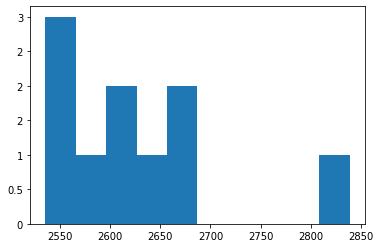

In [12]:
fig, ax = plt.subplots()
hist(ax, spark.sql("""SELECT country, count(session_id) 
                    FROM df WHERE event = 'start' 
                    GROUP BY country 
                    ORDER BY count(session_id) DESC, country ASC
                    LIMIT 10""").select('count(session_id)' ))